**author**: lukethompson@gmail.com<br>
**date**: 27 Feb 2017<br>
**language**: Python 3.5<br>
**conda environment**: emp-py3<br>
**license**: unlicensed<br>

## physicochemical_pairplot.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from empcolors import get_empo_cat_color
%matplotlib inline

In [2]:
pd.options.display.max_columns = 50

In [3]:
path_map = '~/emp/metadata-refine/emp_qiime_mapping_qc_filtered_20161208.tsv'
path_scat1 = '~/emp/analyses-envparams/scatter1.pdf'
path_scat2 = '~/emp/analyses-envparams/scatter2.pdf'

In [ ]:
df = pd.read_csv(path_map, sep='\t', index_col=0)

In [5]:
df1 = df[['temperature_deg_c', 'salinity_psu', 'oxygen_mg_per_l', 'ph', 'empo_3']]

In [6]:
df2 = df[['phosphate_umol_per_l', 'nitrate_umol_per_l', 'ammonium_umol_per_l', 'empo_3']] 
# 'sulfate_umol_per_l' -- OTHER NUTRIENTS ARE ALL ~0 WHERE WE HAVE SULFATE DATA (NOT INTERESTING)

In [7]:
for var in ['temperature_deg_c', 'salinity_psu', 'oxygen_mg_per_l', 'ph', 'phosphate_umol_per_l', 
            'nitrate_umol_per_l', 'ammonium_umol_per_l', 'sulfate_umol_per_l']:
    print(var, df[var].max())

temperature_deg_c 91.0
salinity_psu 37.0659
oxygen_mg_per_l 18.7
ph 12.63
phosphate_umol_per_l 402.0
nitrate_umol_per_l 3107.1
ammonium_umol_per_l 4541.0
sulfate_umol_per_l 38.3


In [8]:
dict_xlim = {
    'temperature_deg_c': [-25, 105], 
    'salinity_psu': [-2.5, 42.5], 
    'oxygen_mg_per_l': [-1.5, 22.5], 
    'ph': [1, 13], 
    'phosphate_umol_per_l': [-50, 450], 
    'nitrate_umol_per_l': [-400, 3400],
    'ammonium_umol_per_l': [-500, 4650]
}

dict_xticks = {
    'temperature_deg_c': [-20, 0, 20, 40, 60, 80, 100], 
    'salinity_psu': [0, 10, 20, 30, 40], 
    'oxygen_mg_per_l': [0, 5, 10, 15, 20], 
    'ph': [2, 4, 6, 8, 10, 12], 
    'phosphate_umol_per_l': [0, 100, 200, 300, 400], 
    'nitrate_umol_per_l': [0, 1000, 2000, 3000], 
    'ammonium_umol_per_l':[0, 1000, 2000, 3000, 4000]
}

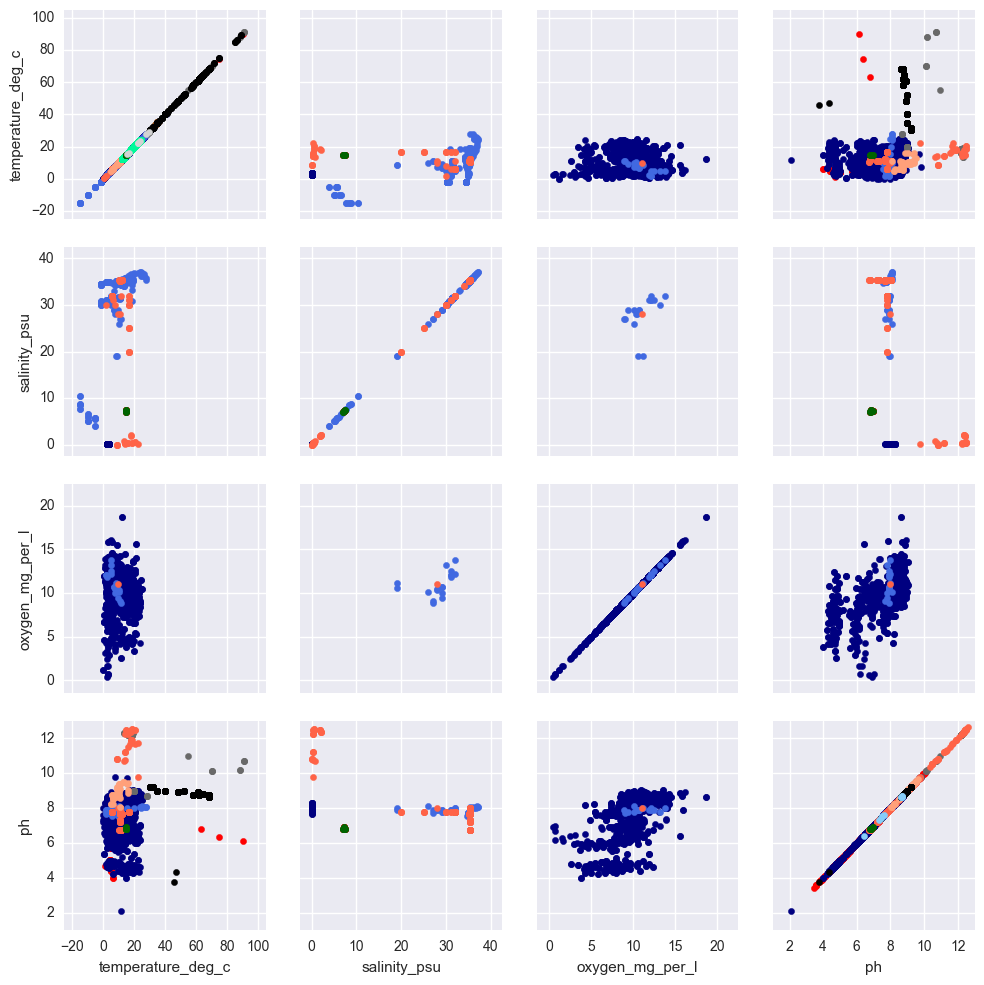

In [9]:
g = sns.PairGrid(df1, hue='empo_3', palette=get_empo_cat_color(returndict=True))
g = g.map(plt.scatter, alpha=1.0)
# g = g.map_offdiag(plt.scatter, alpha=1.0)
# g = g.map_diag(plt.hist)

# TEMP
g.axes[0][0].set_ylim(dict_xlim['temperature_deg_c'])
g.axes[3][0].set_xlim(dict_xlim['temperature_deg_c'])
g.axes[0][0].set_yticks(dict_xticks['temperature_deg_c'])
g.axes[3][0].set_xticks(dict_xticks['temperature_deg_c'])

# SAL
g.axes[1][0].set_ylim(dict_xlim['salinity_psu'])
g.axes[3][1].set_xlim(dict_xlim['salinity_psu'])
g.axes[1][0].set_yticks(dict_xticks['salinity_psu'])
g.axes[3][1].set_xticks(dict_xticks['salinity_psu'])

# OX
g.axes[2][0].set_ylim(dict_xlim['oxygen_mg_per_l'])
g.axes[3][2].set_xlim(dict_xlim['oxygen_mg_per_l'])
g.axes[2][0].set_yticks(dict_xticks['oxygen_mg_per_l'])
g.axes[3][2].set_xticks(dict_xticks['oxygen_mg_per_l'])

# PH
g.axes[3][0].set_ylim(dict_xlim['ph'])
g.axes[3][3].set_xlim(dict_xlim['ph'])
g.axes[3][0].set_yticks(dict_xticks['ph'])
g.axes[3][3].set_xticks(dict_xticks['ph'])

g.savefig(path_scat1)

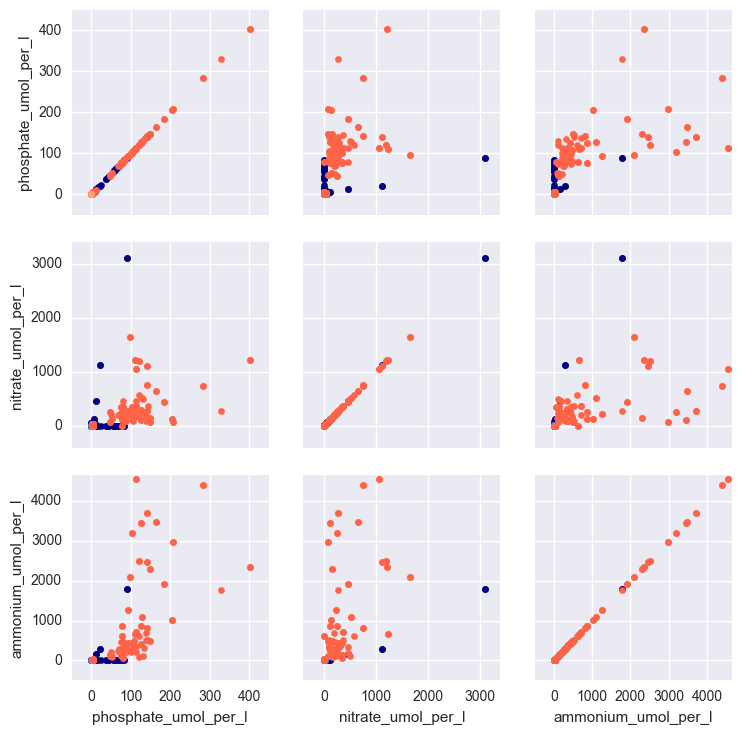

In [10]:
g = sns.PairGrid(df2, hue='empo_3', palette=get_empo_cat_color(returndict=True))
g = g.map(plt.scatter, alpha=1.0)
# g = g.map_offdiag(plt.scatter, alpha=1.0)
# g = g.map_diag(plt.hist)

# PHOS
g.axes[0][0].set_ylim(dict_xlim['phosphate_umol_per_l'])
g.axes[2][0].set_xlim(dict_xlim['phosphate_umol_per_l'])
g.axes[0][0].set_yticks(dict_xticks['phosphate_umol_per_l'])
g.axes[2][0].set_xticks(dict_xticks['phosphate_umol_per_l'])

# NITR
g.axes[1][0].set_ylim(dict_xlim['nitrate_umol_per_l'])
g.axes[2][1].set_xlim(dict_xlim['nitrate_umol_per_l'])
g.axes[1][0].set_yticks(dict_xticks['nitrate_umol_per_l'])
g.axes[2][1].set_xticks(dict_xticks['nitrate_umol_per_l'])

# AMM
g.axes[2][0].set_ylim(dict_xlim['ammonium_umol_per_l'])
g.axes[2][2].set_xlim(dict_xlim['ammonium_umol_per_l'])
g.axes[2][0].set_yticks(dict_xticks['ammonium_umol_per_l'])
g.axes[2][2].set_xticks(dict_xticks['ammonium_umol_per_l'])

g.savefig(path_scat2)

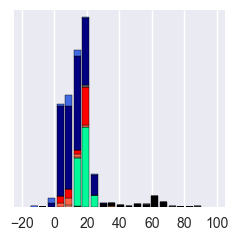

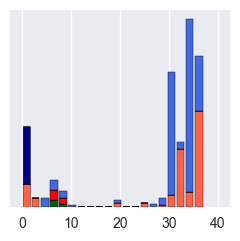

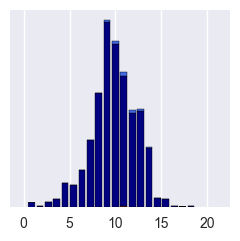

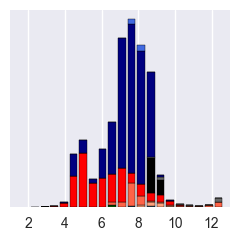

In [152]:
df1melt = pd.melt(df1, id_vars='empo_3')
empo_list = list(set(df1melt.empo_3))
empo_list.sort()
empo_colors = [get_empo_cat_color(returndict=True)[x] for x in empo_list]

for var in ['temperature_deg_c', 'salinity_psu', 'oxygen_mg_per_l', 'ph']:
    list_of = [0] * len(empo_list)
    df1melt2 = df1melt[df1melt['variable'] == var].drop('variable', axis=1)
    for empo in np.arange(len(empo_list)):
        list_of[empo] = list(df1melt2.pivot(columns='empo_3')['value'][empo_list[empo]].dropna())

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2.5,2.5))    
    plt.hist(list_of, color=empo_colors, 
            bins=20,
            stacked=True)
    plt.xlim(dict_xlim[var])
    plt.xticks(dict_xticks[var])
    plt.yticks([])
    if var == 'temperature_deg_c':
        plt.ylim([0, 2200])
    elif var == 'salinity_psu':
        plt.ylim([0, 167])
    elif var == 'oxygen_mg_per_l':
        plt.ylim([0, 236])
    elif var == 'ph':
        plt.ylim([0, 810])
    fig.tight_layout()
    fig.savefig('~/emp/analyses-envparams/hist_%s.pdf' % var)

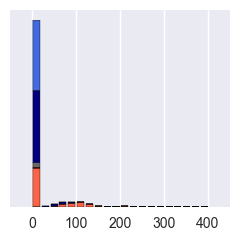

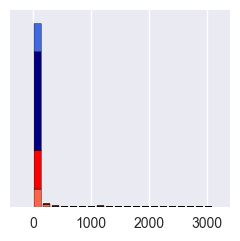

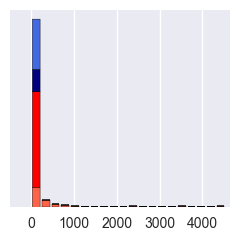

In [143]:
df2melt = pd.melt(df2, id_vars='empo_3')
empo_list = list(set(df2melt.empo_3))
empo_list.sort()
empo_colors = [get_empo_cat_color(returndict=True)[x] for x in empo_list]

for var in ['phosphate_umol_per_l', 'nitrate_umol_per_l', 'ammonium_umol_per_l']:
    list_of = [0] * len(empo_list)
    df2melt2 = df2melt[df2melt['variable'] == var].drop('variable', axis=1)
    for empo in np.arange(len(empo_list)):
        list_of[empo] = list(df2melt2.pivot(columns='empo_3')['value'][empo_list[empo]].dropna())

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2.5,2.5))    
    plt.hist(list_of, color=empo_colors, 
            bins=20,
            stacked=True)
    plt.xlim(dict_xlim[var])
    plt.xticks(dict_xticks[var])
    plt.yticks([])
    fig.tight_layout()
    fig.savefig('~/emp/analyses-envparams/hist_%s.pdf' % var)